<a href="https://colab.research.google.com/github/SpiderPork28/Analitica/blob/main/Final_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMART
Alan

*   S:
Have Pokémon stats increased over the course of the generations?
*   M: The total base stats of Pokémon have increased across generations with a variability 5%
*   A: using the tools of the course (box plot , histograms , heat map , elbow curb k-means analisis clustering algorithm)
*   R: analyzing how statistics have changed over generations
*   T: the week from May 5th to 8th


GitHub

https://github.com/SpiderPork28/Analitica

Emiliano

*   S: Have Pokémon stats decrease  over the course of the generations?
*   M: The total base stats of Pokémon have decrease across generations with a variability 5%
*   A: using the tools of the course (box plot , histograma , heat map , elbow curb k-means analisis clustering algorithm)
*   R: analyzing how statistics have changed over generations
*   T: the week from May 5th to 8th


GitHub

https://github.com/EmilianoLopez31/Day1/tree/main
















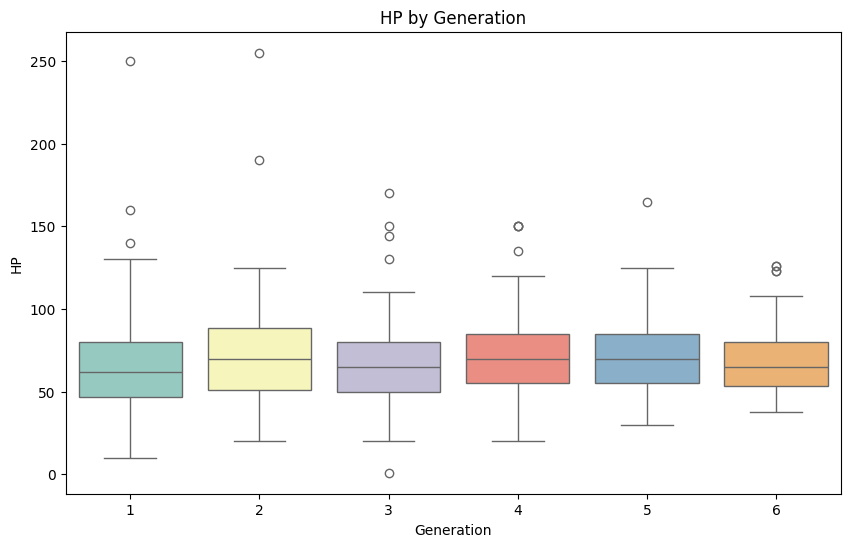

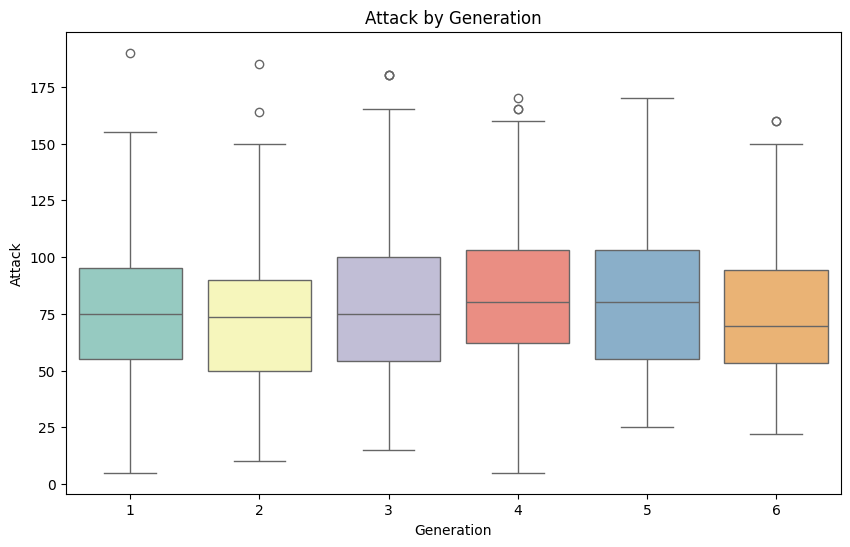

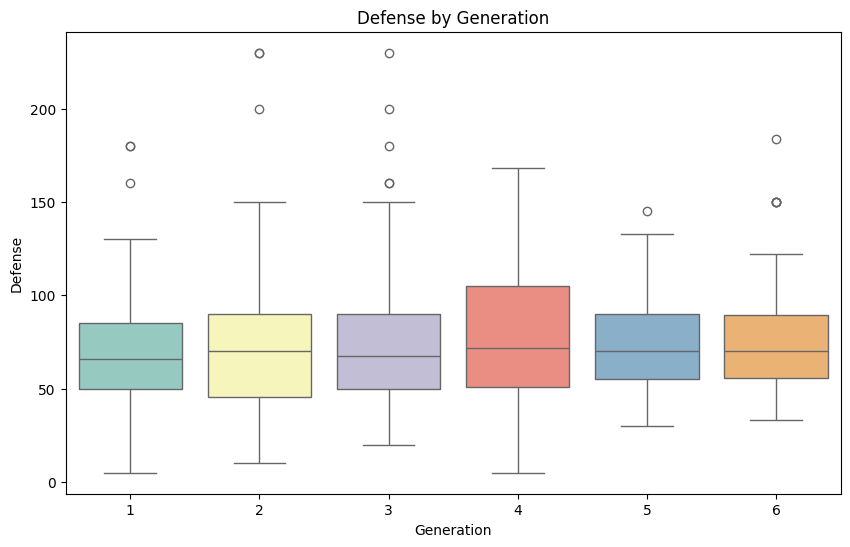

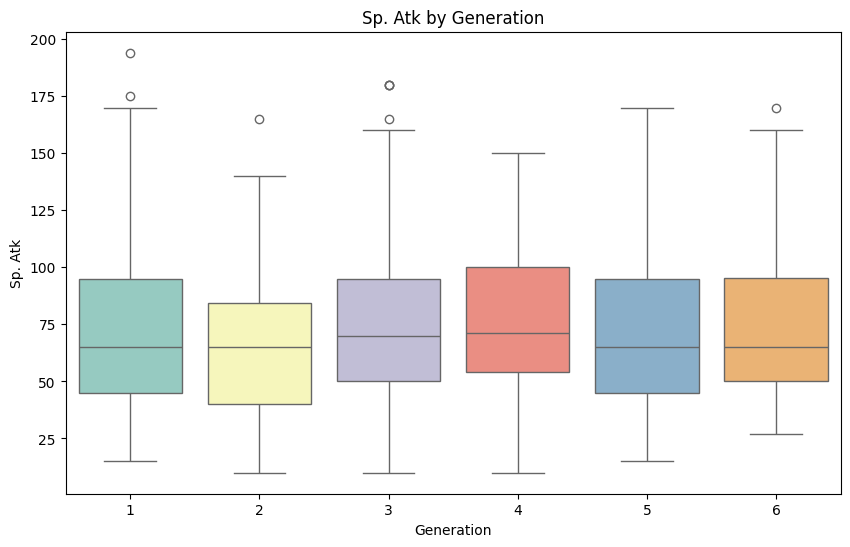

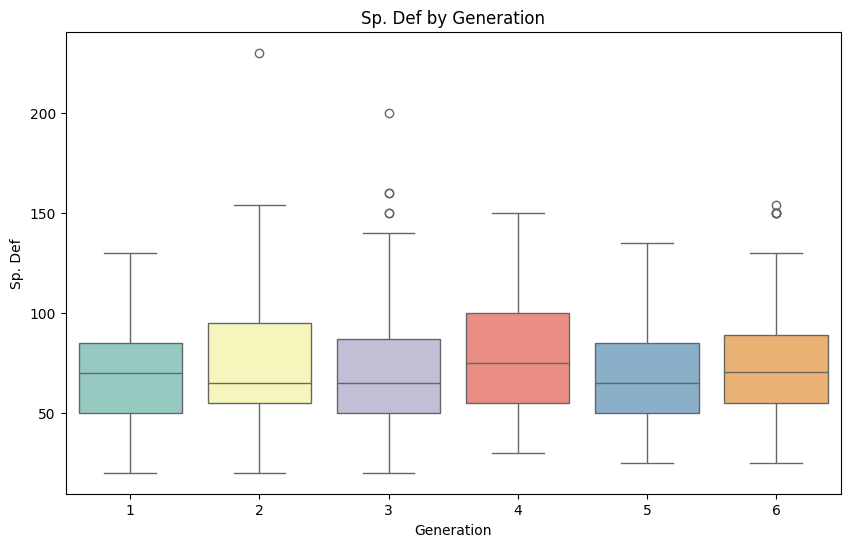

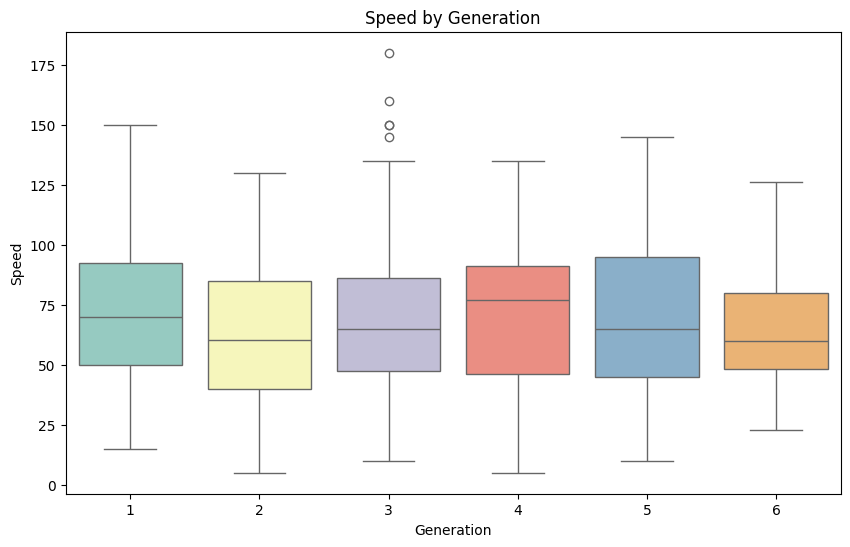

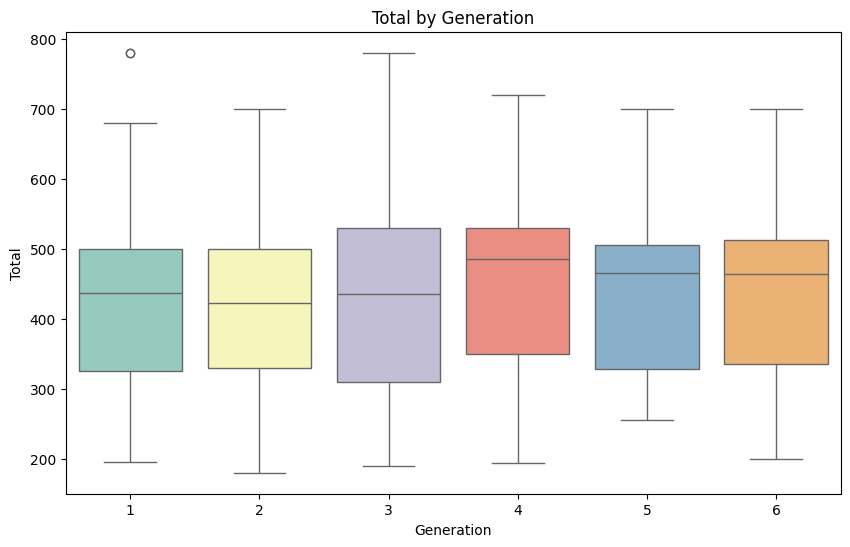

In [3]:
# Seleccionamos las columnas numéricas relevantes
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
statsNor = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Creamos un boxplot para cada estadística agrupado por generación
for stat in stats:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Generation', y=stat, palette='Set3', hue='Generation', legend=False)
    plt.title(f'{stat} by Generation')
    plt.show()

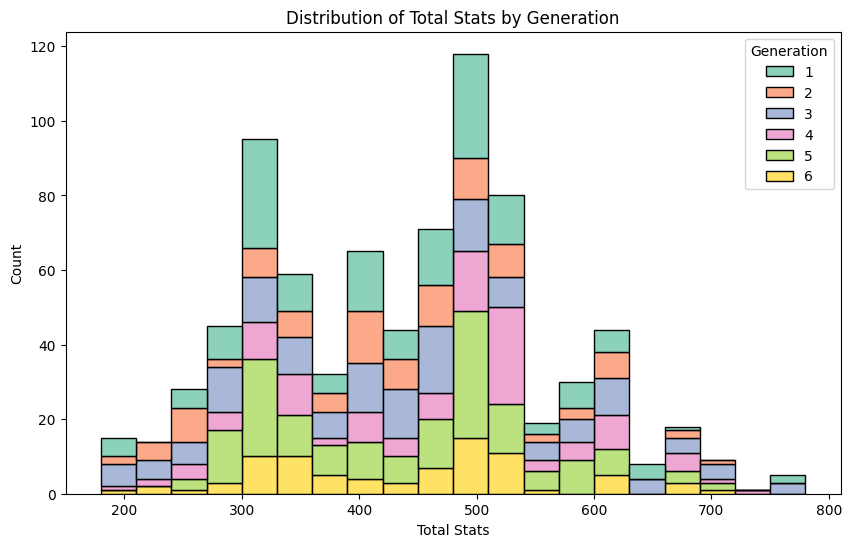

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total', hue='Generation', multiple='stack', palette='Set2', bins=20)
plt.title('Distribution of Total Stats by Generation')
plt.xlabel('Total Stats')
plt.ylabel('Count')
plt.show()

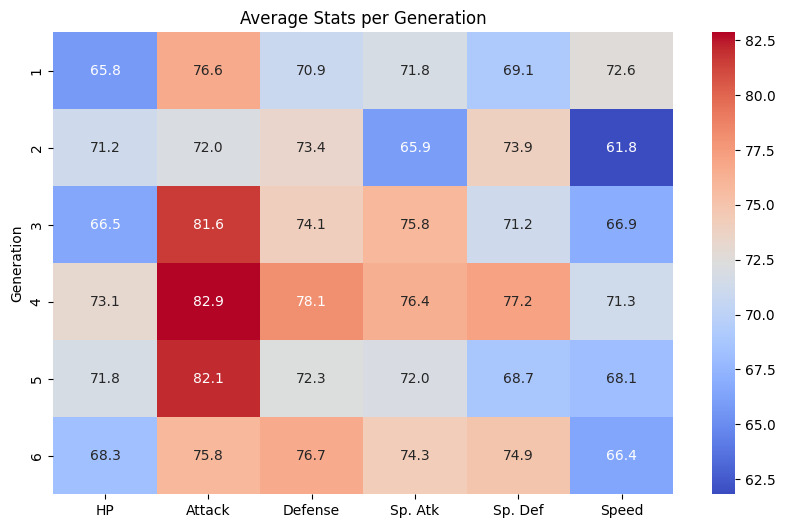

In [5]:
# Calculamos promedios por generación
gen_means = df.groupby('Generation')[statsNor].mean()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gen_means, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Stats per Generation')
plt.show()

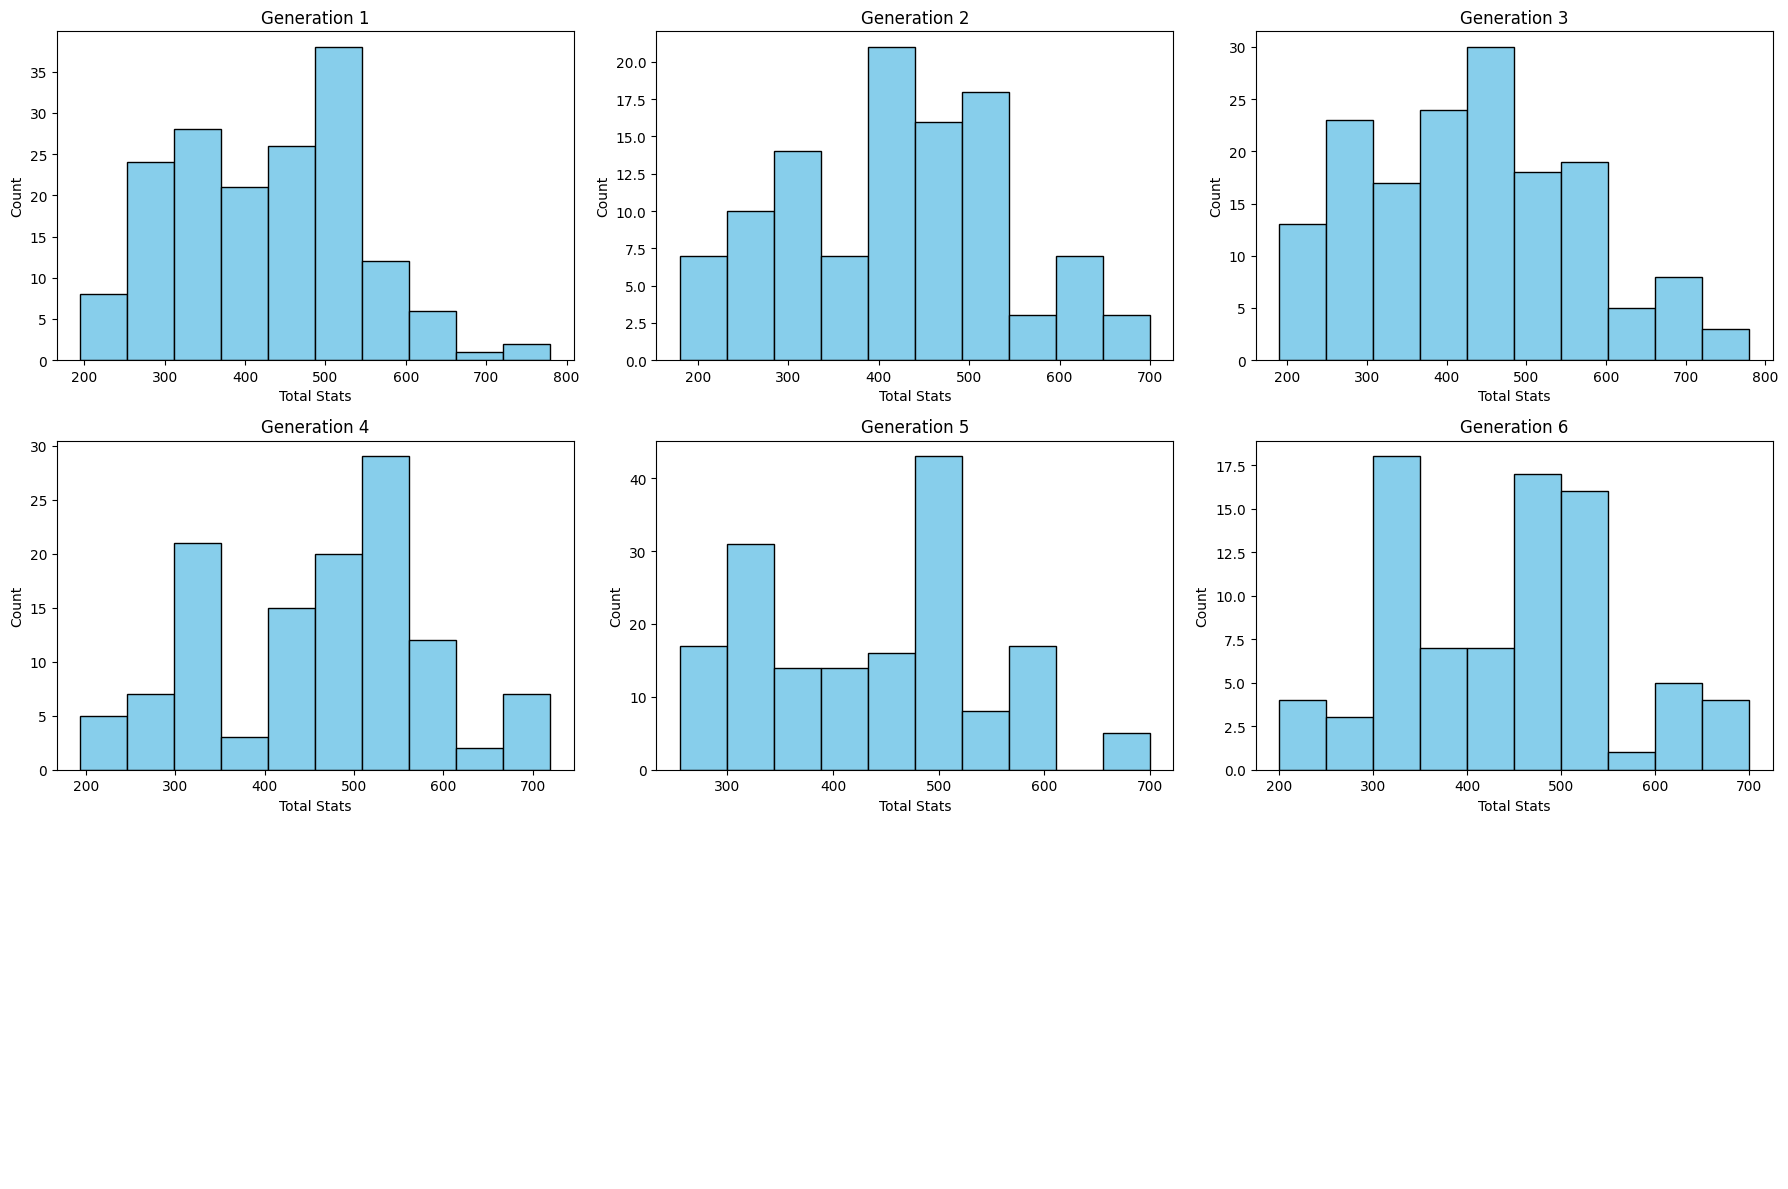

In [6]:
# Asegúrate de que tu DataFrame se llama df y contiene la columna 'Generation'
generaciones = df['Generation'].unique()
generaciones.sort()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, gen in enumerate(generaciones):
    gen_df = df[df['Generation'] == gen]
    axes[i].hist(gen_df['Total'], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Generation {gen}')
    axes[i].set_xlabel('Total Stats')
    axes[i].set_ylabel('Count')

# Ocultar los subplots vacíos si hay menos de 9 generaciones
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [10]:
promedios = df.groupby('Generation')['Total'].mean().sort_index()
print(promedios)

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    388.750000
Name: Total, dtype: float64


In [11]:
total_1 = df[df['Generation'] == 1]['Total']
total_6 = df[df['Generation'] == 6]['Total']

mean_1 = total_1.mean()
mean_6 = total_6.mean()

perc_change = ((mean_6 - mean_1) / mean_1) * 100

print(f"Gen 1 mean: {mean_1:.2f}")
print(f"Gen 6 mean: {mean_6:.2f}")
print(f"Percent change from Gen 1 to Gen 6: {perc_change:.2f}%")


Gen 1 mean: 426.81
Gen 6 mean: 388.75
Percent change from Gen 1 to Gen 6: -8.92%



WordCloud for Generation 1


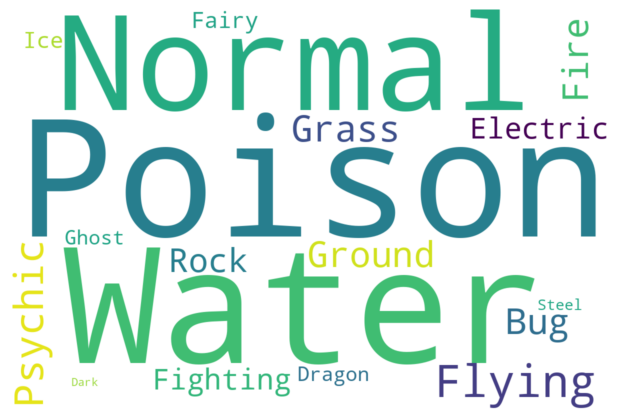


WordCloud for Generation 2


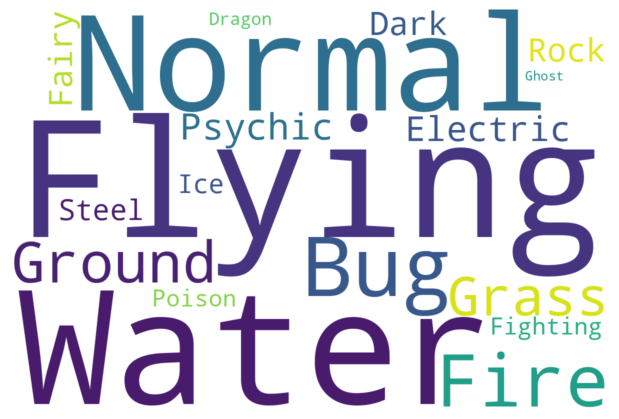


WordCloud for Generation 3


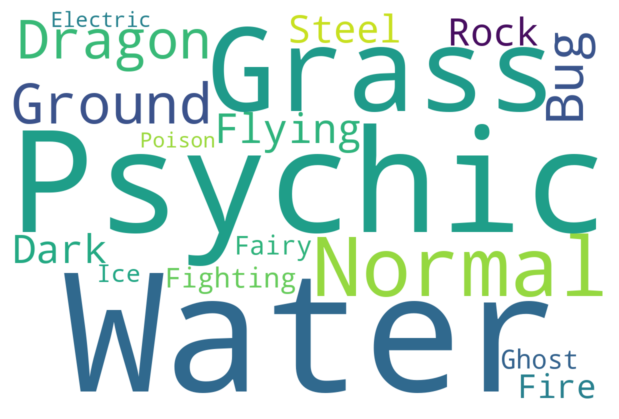


WordCloud for Generation 4


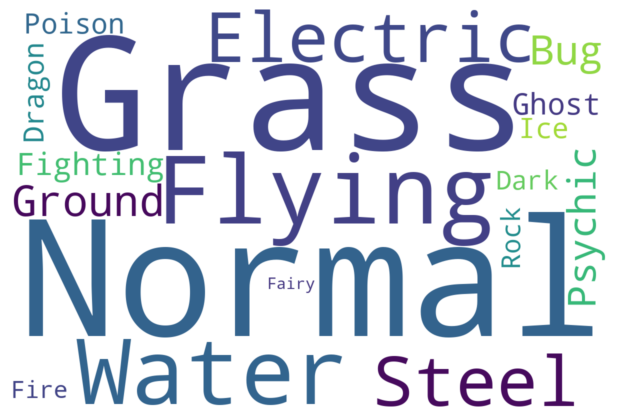


WordCloud for Generation 5


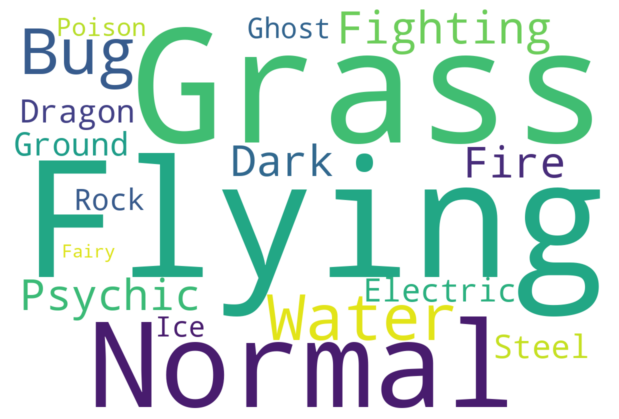


WordCloud for Generation 6


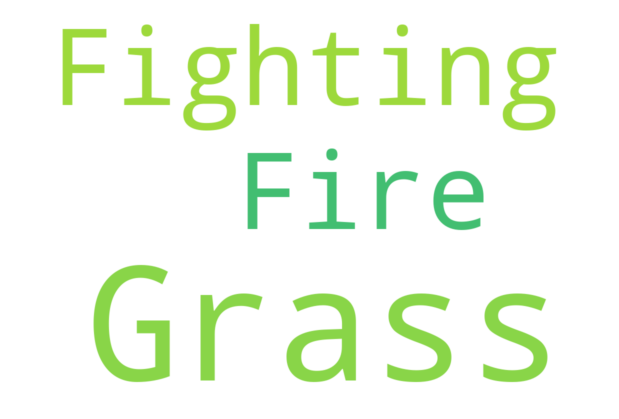

In [16]:
from wordcloud import WordCloud # Import the WordCloud class
from collections import Counter
def wordcloud(counter):
    """A small wordcloud wrapper"""
    wc = WordCloud(width=1200, height=800,
                   background_color="white",
                   max_words=200)
    wc.generate_from_frequencies(counter)

    fig = plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Asegúrate de tener tu DataFrame cargado como df

# Iterar sobre cada generación
generaciones = df['Generation'].unique()
generaciones.sort()

for gen in generaciones:
    df_gen = df[df['Generation'] == gen]
    # Combina Type 1 y Type 2 en una sola lista, ignorando nulos
    tipos = pd.concat([df_gen['Type 1'], df_gen['Type 2']]).dropna()
    conteo = Counter(tipos)
    print(f"\nWordCloud for Generation {gen}")
    wordcloud(conteo)

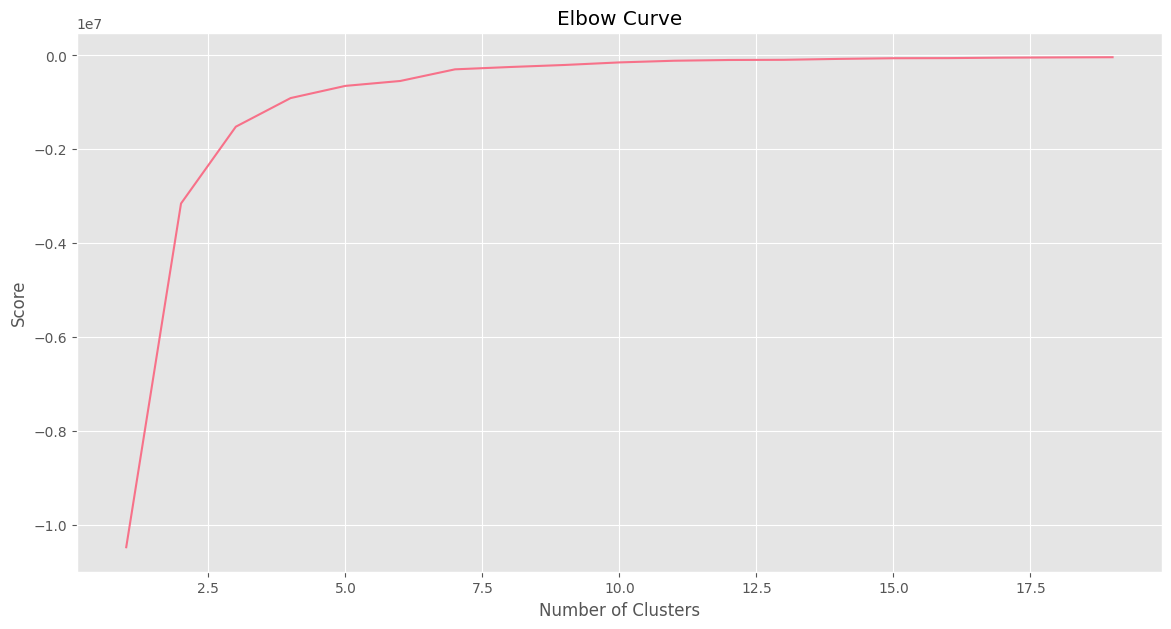

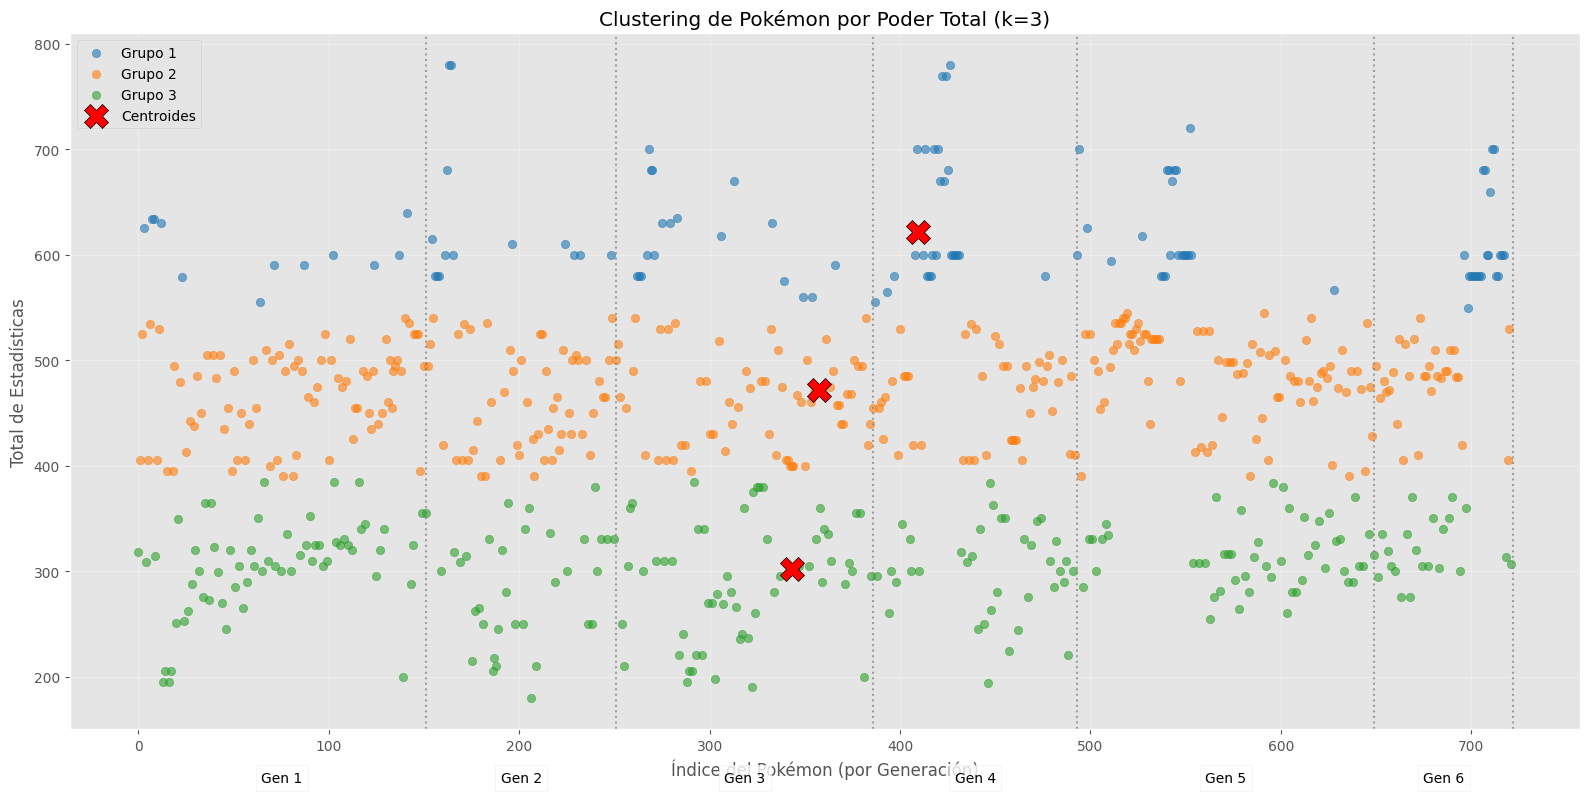


RESUMEN FINAL:

Centroides: [622. 472. 302.]

● Grupo 1:
   Rango Total: 550-780
   Ejemplos:
                   Name Type 1  Total
      LatiasMega Latias Dragon    700
HeracrossMega Heracross    Bug    600
      ScizorMega Scizor    Bug    600

● Grupo 2:
   Rango Total: 390-545
   Ejemplos:
     Name   Type 1  Total
  Sneasel     Dark    430
Honchkrow     Dark    505
     Sawk Fighting    465

● Grupo 3:
   Rango Total: 180-385
   Ejemplos:
   Name  Type 1  Total
Glameow  Normal    310
 Elgyem Psychic    335
Omanyte    Rock    355


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score # Importing the missing silhouette_score function

# Configuración
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 7)
sns.set_palette("husl")


# Cargar y preparar datos
df = pd.read_csv("Pokemon.csv")
df = df[df.index <= 721]  # Solo hasta Gen 6
df = df[~df.index.duplicated(keep='first')]

# 4. Clustering con K-Means (usando Total)
X = df[['Total']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Valor de K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Aplicar K-Means con k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualización final de clustering
plt.figure(figsize=(16, 8))
generation_bounds = {1:(0,151), 2:(151,251), 3:(251,386),
                    4:(386,493), 5:(493,649), 6:(649,722)}

# Scatter plot por cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['Total'],
                c=colors[i], label=f'Grupo {i+1}', alpha=0.6)

# Centroides
x_pos = [df[df['Cluster'] == i].index.to_series().mean() for i in range(k)]
plt.scatter(x_pos, centroids, marker='X', s=300, c='red',
            edgecolors='black', label='Centroides')

# Líneas de generación
for gen, (start, end) in generation_bounds.items():
    plt.axvline(end, color='gray', linestyle=':', alpha=0.7)
    plt.text((start+end)/2, 100, f'Gen {gen}',
             ha='center', bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Índice del Pokémon (por Generación)')
plt.ylabel('Total de Estadísticas')
plt.title('Clustering de Pokémon por Poder Total (k=3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen estadístico
print("\nRESUMEN FINAL:")
print(f"\nCentroides: {centroids.flatten().round(0)}")
for i in range(k):
    group = df[df['Cluster'] == i]
    print(f"\n● Grupo {i+1}:")
    print(f"   Rango Total: {group['Total'].min():.0f}-{group['Total'].max():.0f}")
    print("   Ejemplos:")
    print(group[['Name', 'Type 1', 'Total']].sample(3).to_string(index=False))

Conclusion

Alan: As we can see in the clustering graph, the three centroids tend to lean more to the right or left depending on the number of Pokémon that fall within their stat ranges. Cluster 1 leans more to the right, indicating that more Pokémon with higher stats appear in newer generations. On the other hand, clusters 2 and 3, which contain Pokémon with balanced or low stats, show a significant shift to the left compared to cluster 1, suggesting that earlier generations had lower total base stats overall.

Additionally, if we look at the heat map and compare the data from the first generation to the highest value we can find in the following generations, we can see an increase of over 5%. However, when comparing it specifically to Generation 6, the increase is less than 5%, and in some cases, there’s even a decrease.

In conclusion, over several generations there was a significant increase in Pokémon stats. However, it’s likely that the game developers realized this could lead to a major imbalance between generations in the long term. As a result, they may have started to regulate the stats to keep them within a certain range and prevent older generations from being left behind.

---

Conclusiones

Emiliano

In generation 1 - 5 we can see a stable amount of in the averages of the total statistics of the pokemon however it is seen that the average decreases by 8.92 which could tell us that there was a decrease however in the k-mean analysis we can see that the centroids have a tendency to the right indicating that the pokemons of later generations are higher so we could conclude that the quality of the pokemons has increased but there is also an inclusion of weak pokemon that lower the final average
